In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#import the csv as a pandas dataframe
snow = pd.read_csv('Telluride - Colorado.csv', parse_dates=[0], header = 0, names = ['date', 'new24h', 'season_cum', 'base'], index_col=0)

#remove the units from new snow and base depth columns and coerce to int dtype
snow['new24h'] = snow['new24h'].str.replace(r' cm', '')
snow['base'] = snow['base'].str.replace(r' cm', '')

#drop season total column (recalculated later)
snow = snow.drop('season_cum', axis=1)

#sort the dataframe by 'date' and resample so every day is included
snow = snow.reindex()
snow = snow.resample('D').asfreq()

#fill NaN values in new snowfall column with 0
snow['new24h'] = snow['new24h'].fillna(0)
snow['new24h'] = snow['new24h'].astype(int)

#replace all 0 values in base depth with NaN
snow['base'] = snow['base'].replace(0, np.nan)

#create 'year' and 'month' columns
snow = snow.reset_index()
snow['year'] = pd.DatetimeIndex(snow['date']).year
snow['month'] = pd.DatetimeIndex(snow['date']).month

#create season column
for i in range(len(snow)):
    if snow.loc[i, 'month'] >= 11:
        snow.loc[i, 'season'] = snow.loc[i, 'year']
    elif snow.loc[i, 'month'] <= 3:
        snow.loc[i, 'season'] = snow.loc[i, 'year'].astype(int) - 1
    else:
        snow.loc[i, 'season'] = 0

#remove month and year columns, make 'season' int type, set date as index again, create empty season_cum column
snow = snow.drop(columns=['month', 'year'])
snow['season'] = snow['season'].astype(int, errors='ignore')
snow['season_cum'] = ''

#create vars needed in for loop
x = int(snow['season'].min())
y = int(snow['season'].max() + 1)
d = pd.DataFrame()

#populate season_cum column and fillna on base col
for i in range(x, y):
    df = snow[snow['season'] == i]
    df.base = df['base'].fillna(method = 'ffill')
    df.season_cum = df['new24h'].cumsum()
    d = d.append(df)

for i in range(len(snow)):
    snow.loc[i,'season_cum'] = d.loc[i, 'season_cum']
    snow.loc[i,'base'] = d.loc[i, 'base']

snow.base = snow.base.fillna(0)
snow.base = snow.base.astype(int)
snow.season_cum = snow.season_cum.astype(int)

#make sure season_cum is >= base
for i in range(len(snow)):
    if snow.loc[i, 'base'] > snow.loc[i, 'season_cum']:
        snow.loc[i, 'season_cum'] = snow.loc[i, 'base']

C:\Users\dalli\anaconda3\envs\Python and R Main\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [3]:
#create a composite df with median values
snow08 = snow[snow['season'] == 2008].reset_index()
snow09 = snow[snow['season'] == 2009].reset_index()
snow10 = snow[snow['season'] == 2010].reset_index()
snow11 = snow[snow['season'] == 2011].reset_index()
snow12 = snow[snow['season'] == 2012].reset_index()
snow13 = snow[snow['season'] == 2013].reset_index()
snow14 = snow[snow['season'] == 2014].reset_index()
snow15 = snow[snow['season'] == 2015].reset_index()
snow16 = snow[snow['season'] == 2016].reset_index()

season_list = [snow08, snow09, snow10, snow11, snow12, snow13, snow14, snow15, snow16]

snow_comp = pd.concat(season_list, axis=1).drop(151)
base_avg = snow_comp.iloc[:,[9, 15, 21, 27, 33, 39, 45, 51]].median(axis=1)
seasoncum_avg = snow_comp.iloc[:,[11, 17, 23, 29, 35, 41, 47, 53]].median(axis=1)
snow_avg = pd.concat([base_avg, seasoncum_avg], axis=1)
snow_avg = snow_avg.rename(columns={0:'base', 1:'season_cum'})

#remove any precipitous drops in base depth and replace them with nan
snow08['base'] = snow08['base'].replace(0, np.nan)
snow09['base'] = snow09['base'].replace(0, np.nan)
snow10['base'] = snow10['base'].replace(0, np.nan)
snow11['base'] = snow11['base'].replace(0, np.nan)
snow12['base'] = snow12['base'].replace(0, np.nan)
snow13['base'] = snow13['base'].replace(0, np.nan)
snow14['base'] = snow14['base'].replace(0, np.nan)
snow15['base'] = snow15['base'].replace(0, np.nan)
snow16['base'] = snow16['base'].replace(0, np.nan)

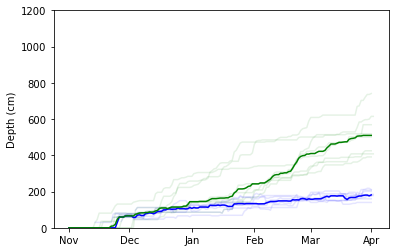

In [4]:
plt.plot('base', data=snow09, alpha=0.1, color='b')
plt.plot('season_cum', data=snow09, alpha = 0.1, color='g')

plt.plot('base', data=snow10, alpha=0.1, color='b')
plt.plot('season_cum', data=snow10, alpha = 0.1, color='g')

plt.plot('base', data=snow11, alpha=0.1, color='b')
plt.plot('season_cum', data=snow11, alpha = 0.1, color='g')

plt.plot('base', data=snow12, alpha=0.1, color='b')
plt.plot('season_cum', data=snow12, alpha = 0.1, color='g')

plt.plot('base', data=snow13, alpha=0.1, color='b')
plt.plot('season_cum', data=snow13, alpha = 0.1, color='g')

plt.plot('base', data=snow14, alpha=0.1, color='b')
plt.plot('season_cum', data=snow14, alpha = 0.1, color='g')

plt.plot('base', data=snow15, alpha=0.1, color='b')
plt.plot('season_cum', data=snow15, alpha = 0.1, color='g')

plt.plot('base', data=snow16, alpha=0.1, color='b')
plt.plot('season_cum', data=snow16, alpha = 0.1, color='g')

plt.plot('base', data=snow_avg, color='b')
plt.plot('season_cum', data=snow_avg, color='g')

plt.xticks([0, 30, 61, 92, 120, 150], ['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'])
plt.ylabel('Depth (cm)')
plt.ylim([0,1200])

plt.savefig('telluride_agg.png', dpi=300)